In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_train=x_train/255
x_test=x_test/255
input_shape = (28, 28, 1)

In [7]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 160ms/step - accuracy: 0.0999 - loss: 2.3177 - val_accuracy: 0.1070 - val_loss: 2.2988
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 161ms/step - accuracy: 0.1157 - loss: 2.3010 - val_accuracy: 0.1395 - val_loss: 2.2856
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 162ms/step - accuracy: 0.1298 - loss: 2.2894 - val_accuracy: 0.1817 - val_loss: 2.2743
Epoch 4/10
445/469 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.1493 - loss: 2.2786

In [ ]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)



313/313 [==============================] - 0s 1ms/step


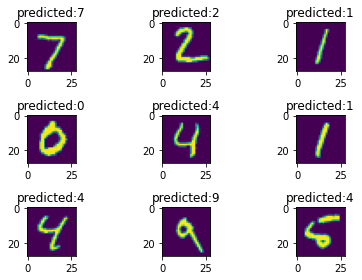

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i])
  plt.title(f"predicted:{y_pred[i]}")
plt.tight_layout()